In [1]:
from pathlib import Path
import pandas as pd

In [2]:
import tomllib

datadir = Path('../data')
configfile = Path("config.toml")

with configfile.open('rb') as f:
    config = tomllib.load(f)

print(config)


{'ptb': 'heart', 'arrhythmia': 'heart_big'}


# The PTB Diagnostic ECG Database

- Number of Samples: 14552
- Number of Categories: 2
- Sampling Frequency: 125Hz
- Data Source: Physionet's PTB Diagnostic Database

All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 187. There is a target column named "target".

Lets see how much rows we have

In [3]:
trainfile = datadir / (config['ptb'] + '_train.parq')
testfile = datadir / (config['ptb'] + '_test.parq')

train_df = pd.read_parquet(trainfile)
test_df = pd.read_parquet(testfile)
len(train_df), len(test_df)

(11641, 2911)

And lets check how balanced the dataset is

In [4]:
train_df.target.value_counts(), test_df.target.value_counts()
train_percentages = train_df.target.value_counts(normalize=True) * 100
test_percentages = test_df.target.value_counts(normalize=True) * 100
train_percentages, test_percentages

(target
 1.0    72.16734
 0.0    27.83266
 Name: proportion, dtype: float64,
 target
 1.0    72.31192
 0.0    27.68808
 Name: proportion, dtype: float64)

In [5]:
train_df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '178', '179', '180', '181', '182', '183', '184', '185', '186',
       'target'],
      dtype='object', length=188)

The last column is the target column

What does a signal look like?

Matplotlib is building the font cache; this may take a moment.


0      0.975984
1      0.569526
2      0.379415
3      0.188698
4      0.176791
         ...   
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
Name: 305, Length: 187, dtype: float64


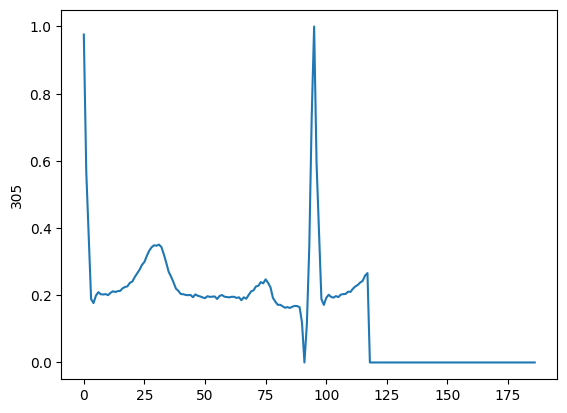

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

signal = train_df.iloc[2, :-1]
sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));
print(signal)


# Arrhythmia Dataset

- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 187. There is a target column named "target".

How is the train/test split?

In [9]:
trainfile = datadir / (config['arrhythmia'] + '_train.parq')
testfile = datadir / (config['arrhythmia'] + '_test.parq')


train_df = pd.read_parquet(trainfile)
test_df = pd.read_parquet(testfile)
len(train_df), len(test_df)

(87554, 21892)

And what about the balance of the target?

In [10]:
train_df.target.value_counts(), test_df.target.value_counts()
train_percentages = train_df.target.value_counts(normalize=True) * 100
test_percentages = test_df.target.value_counts(normalize=True) * 100
train_percentages, test_percentages

(target
 0.0    82.772917
 4.0     7.345181
 2.0     6.610777
 1.0     2.539005
 3.0     0.732120
 Name: proportion, dtype: float64,
 target
 0.0    82.760826
 4.0     7.345149
 2.0     6.614288
 1.0     2.539741
 3.0     0.739996
 Name: proportion, dtype: float64)

What does the signal look like?

0      1.000000
1      0.659459
2      0.186486
3      0.070270
4      0.070270
         ...   
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
Name: 2, Length: 187, dtype: float64


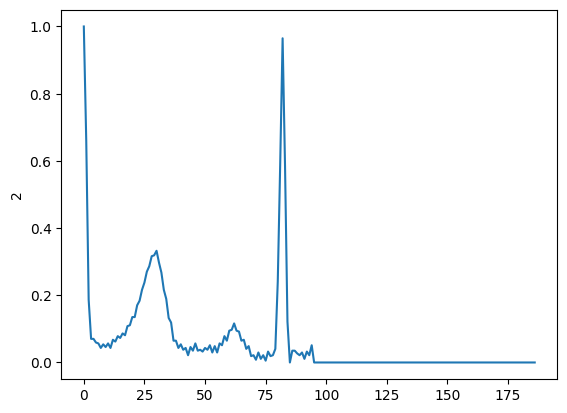

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

signal = train_df.iloc[2, :-1]
print(signal)

sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));

In [22]:
trainfile_ovs = datadir / (config['arrhythmia'] + '_oversampled_full_train.parq')
train_df_oversampled = pd.read_parquet(trainfile_ovs)
print(f'New dataset: {train_df_oversampled.shape}')
print(f'Difference with original dataset: {(train_df_oversampled.shape[0] - train_df.shape[0])} datapoints')
print(f'Increase: {((train_df_oversampled.shape[0] - train_df.shape[0]) / train_df.shape[0]) * 100:.2f}%')

New dataset: (275000, 188)
Difference: 187446 datapoints
Increase: 214.09%


0      0.974239
1      0.932084
2      0.590164
3      0.131148
4      0.014052
         ...   
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
Name: 32005, Length: 187, dtype: float64


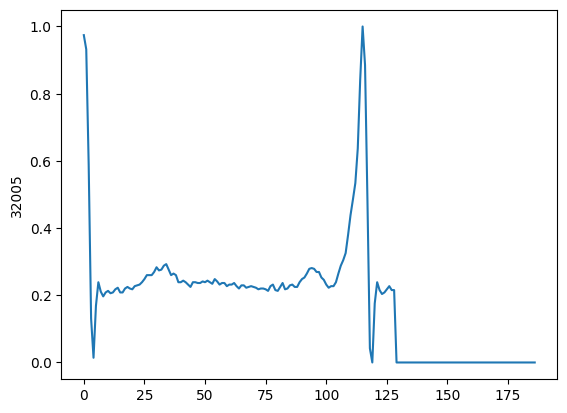

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

signal = train_df_oversampled.iloc[2, :-1]
print(signal)

sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));

In [29]:
trainfile_smote = datadir / (config['arrhythmia'] + '_SMOTE_train.parq')

train_df_smote = pd.read_parquet(trainfile_smote)
print(f'New dataset: {train_df_smote.shape}')
print(f'Difference with original dataset: {(train_df_smote.shape[0] - train_df.shape[0])} datapoints')
print(f'Increase: {((train_df_smote.shape[0] - train_df.shape[0]) / train_df.shape[0]) * 100:.2f}%')
original_count = train_df.shape[0]
smote_count = train_df_smote.shape[0] - original_count
oversampled_count = train_df_oversampled.shape[0] - original_count

print(f'Original data: {original_count} samples')
print(f'SMOTE synthetic data: {smote_count} samples ({(smote_count / (train_df_smote.shape[0])) * 100:.2f}%)')
print(f'Oversampled synthetic data: {oversampled_count} samples ({(oversampled_count / (train_df_oversampled.shape[0])) * 100:.2f}%)')

New dataset: (362355, 188)
Difference with original dataset: 274801 datapoints
Increase: 313.86%
Original data: 87554 samples
SMOTE synthetic data: 274801 samples (75.84%)
Oversampled synthetic data: 187446 samples (68.16%)


0      0.001631
1      0.098123
2      0.269659
3      0.363116
4      0.461467
         ...   
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
Name: 88125, Length: 187, dtype: float64


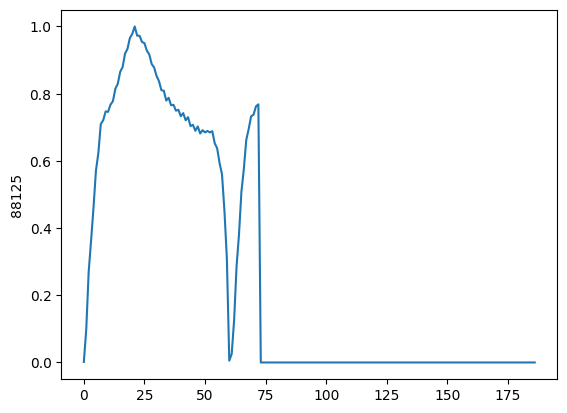

In [36]:
signal = train_df_smote.iloc[88125, :-1]
print(signal)

sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));

In [37]:
from src import datasets, metrics
trainfile = trainfile_smote
traindataset = datasets.HeartDataset1D(trainfile, target="target")
testdataset = datasets.HeartDataset1D(testfile, target="target")
traindataset, testdataset

(Heartdataset (len 362355), Heartdataset (len 21892))

torch.Size([192, 1]) tensor(0)


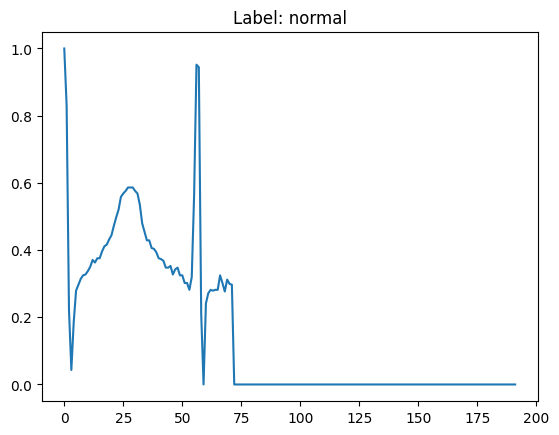

In [38]:
x, y = traindataset[139]
viz = x.squeeze().cpu().numpy()
sns.lineplot(x=range(len(viz)), y=viz)
title = 'normal' if y == 0 else 'abnormal'
plt.title(f"Label: {title}");
print(x.shape, y)

torch.Size([192, 1]) tensor(2)


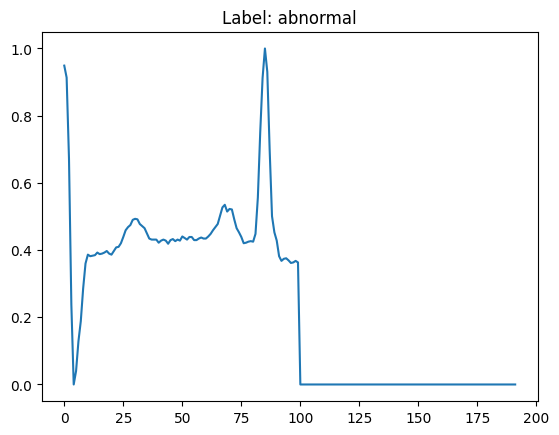

In [43]:
x, y = traindataset[80009]
viz = x.squeeze().cpu().numpy()
sns.lineplot(x=range(len(viz)), y=viz)
title = 'normal' if y == 0 else 'abnormal'
plt.title(f"Label: {title}");
print(x.shape, y)

torch.Size([192, 1]) tensor(1)


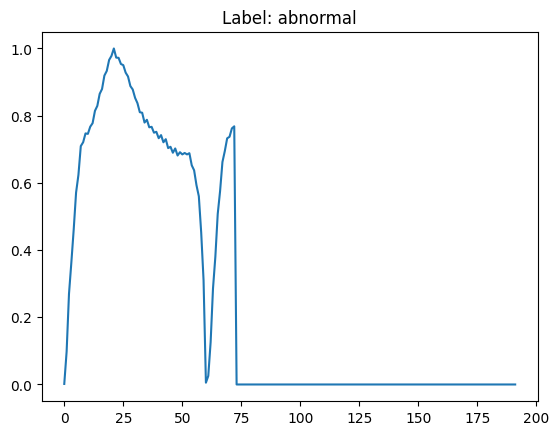

In [46]:
x, y = traindataset[88125] 
viz = x.squeeze().cpu().numpy()
sns.lineplot(x=range(len(viz)), y=viz)
title = 'normal' if y == 0 else 'abnormal'
plt.title(f"Label: {title}");
print(x.shape, y)

torch.Size([192, 1]) tensor(1)


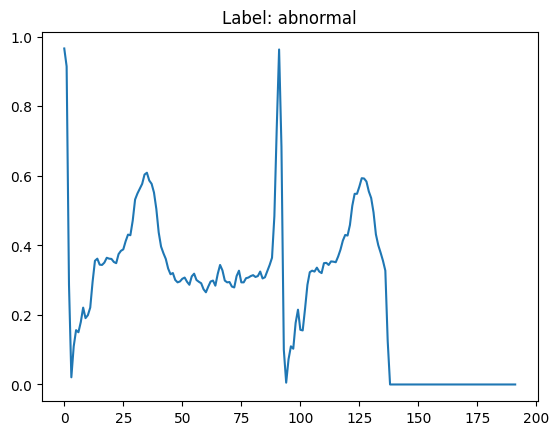

In [ ]:
x, y = traindataset[90459] #88125
viz = x.squeeze().cpu().numpy()
sns.lineplot(x=range(len(viz)), y=viz)
title = 'normal' if y == 0 else 'abnormal'
plt.title(f"Label: {title}");
print(x.shape, y)